In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import floor

In [152]:
def openBestLineupsForDate():
    file_name = 'BestLineups/2020-01-31'
    file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
    return file
def openCreatedLineupsForDate():
    file_name = 'BestCreatedLineups/2020-01-31'
    file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
    return file

x = pd.read_csv('HistoricalData_Merged/2020-02-03')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 40 columns):
Player Name           235 non-null object
position              235 non-null object
injury_status         52 non-null object
game_date             235 non-null object
team                  235 non-null object
opp                   235 non-null object
spread                235 non-null float64
over_under            235 non-null float64
implied_team_score    235 non-null float64
salary                235 non-null int64
L5_dvp_rank           235 non-null int64
L5_ppg_floor          231 non-null float64
L5_ppg_avg            231 non-null float64
L5_ppg_max            231 non-null float64
ppg_projection        235 non-null float64
value_projection      235 non-null float64
Pos                   235 non-null object
Salary                235 non-null int64
Rest                  235 non-null int64
USG                   203 non-null float64
PER                   203 non-null float64
Opp Pace

In [153]:
def dropLowScoringLineups(file):
    drop_level = file.groupby(['Lineup Num'])['Actual FP'].sum().mean() - file.groupby(['Lineup Num'])['Actual FP'].sum().std()
    group = file.groupby(['Lineup Num'])
    return group.filter(lambda x: x['Actual FP'].sum() > drop_level)

def plotLineupActualFP(file):
    file.groupby(['Lineup Num'])['Actual FP'].sum().plot(style='.')
    print(file.groupby(['Lineup Num'])['Actual FP'].sum().mean())
    print(file.groupby(['Lineup Num'])['Actual FP'].sum().max())
    
def plotLineupProjectedFP(file, projectionType):
    file.groupby(['Lineup Num'])[projectionType].sum().plot(style='.')

In [154]:
actual = openBestLineupsForDate()
created = openCreatedLineupsForDate()

370.01515151515156
404.3


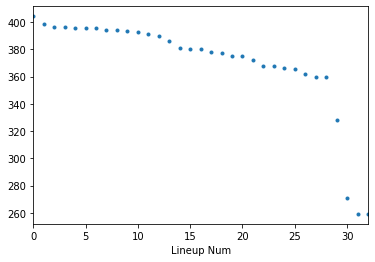

In [155]:
actual = dropLowScoringLineups(actual)
plotLineupActualFP(actual)

273.20799999999997
357.0


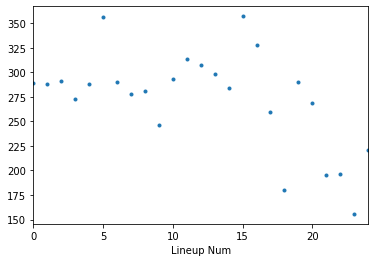

In [156]:
plotLineupActualFP(created)

295.91875000000005
357.0


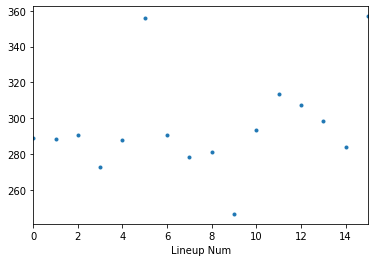

In [157]:
plotLineupActualFP(created.loc[:15])

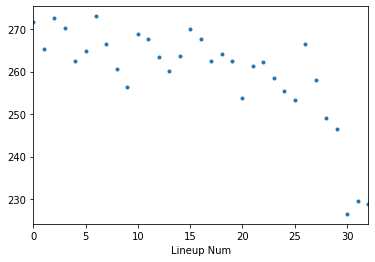

In [158]:
plotLineupProjectedFP(actual, "FantasyFuelPPGProj")

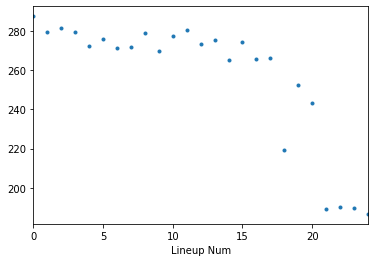

In [159]:
plotLineupProjectedFP(created, 'Avg Proj')

In [160]:
def dropLowScoringPlayers(file):
    file = file.reset_index().drop(['Lineup Num' ], axis=1)
    file.drop_duplicates(subset ="Player Name", keep = 'first', inplace = True) 
    drop_level = file['Actual FP'].mean() - file['Actual FP'].std()
    return file[file.apply(lambda  x: x['Actual FP'] > drop_level, axis=1)]

def dropLowSelectedPlayers(file):
    file = file.reset_index().drop(['Lineup Num' ], axis=1)
    file = addPlayerOccurences(file)
    file.drop_duplicates(subset ="Player Name", keep = 'first', inplace = True) 
    #drop_level = file['Avg Proj'].mean() - file['Avg Proj'].std()
    return file[file.apply(lambda  x: x['Avg Proj'] > 0, axis=1)]

def addPlayerOccurences(file):
    file['Selected'] = np.nan
    values = file['Player Name'].value_counts().keys().tolist()
    counts = file['Player Name'].value_counts().tolist()
    for i in range(len(values)):
        file.loc[file['Player Name'] == values[i],['Selected']] = counts[i]
    return file

act = set(dropLowScoringPlayers(actual)['Player Name'].value_counts().keys().tolist())

cre = set(dropLowSelectedPlayers(created)['Player Name'].value_counts().keys().tolist())


print(len(act.intersection(cre)))

21


In [161]:
len(act)

48

In [162]:
len(cre)

55

In [163]:
act.symmetric_difference(cre)

{'Ben McLemore',
 'CJ McCollum',
 'Chandler Hutchison',
 'Coby White',
 'Damian Lillard',
 'Danilo Gallinari',
 'Danny Green',
 'Danuel House Jr.',
 'Deandre Ayton',
 'Delon Wright',
 'Dennis Schroder',
 'Denzel Valentine',
 'Derrick Rose',
 'Devin Booker',
 'Dorian Finney-Smith',
 'Eric Bledsoe',
 'Eric Gordon',
 'Fred VanVleet',
 'Garrett Temple',
 'Gary Trent Jr.',
 'Hassan Whiteside',
 'JJ Redick',
 'Ja Morant',
 'JaVale McGee',
 'Jae Crowder',
 'Jalen Brunson',
 'Jared Dudley',
 'Jarrett Allen',
 'Joe Harris',
 'Josh Hart',
 'Juancho Hernangomez',
 'Justin Jackson',
 'Kyle Anderson',
 'Kyle Korver',
 'Kyrie Irving',
 'LeBron James',
 'Luke Kornet',
 'Maxi Kleber',
 'Michael Porter Jr.',
 'Mikal Bridges',
 'Monte Morris',
 'Nikola Jokic',
 'P.J. Tucker',
 'PJ Dozier',
 'Pascal Siakam',
 'Pat Connaughton',
 'Patrick McCaw',
 'Rajon Rondo',
 'Reggie Jackson',
 'Russell Westbrook',
 'Sterling Brown',
 'Steven Adams',
 'Thabo Sefolosha',
 'Thaddeus Young',
 'Thon Maker',
 'Timothe Luwa

In [164]:
act.difference(cre)

{'Ben McLemore',
 'Chandler Hutchison',
 'Damian Lillard',
 'Danilo Gallinari',
 'Danny Green',
 'Dennis Schroder',
 'Denzel Valentine',
 'Eric Gordon',
 'Garrett Temple',
 'Gary Trent Jr.',
 'Hassan Whiteside',
 'Jae Crowder',
 'Joe Harris',
 'Josh Hart',
 'Juancho Hernangomez',
 'Kyrie Irving',
 'Luke Kornet',
 'Maxi Kleber',
 'Michael Porter Jr.',
 'Monte Morris',
 'Pat Connaughton',
 'Steven Adams',
 'Thabo Sefolosha',
 'Thaddeus Young',
 'Tony Snell',
 'Trevor Ariza',
 'Tyus Jones'}

In [165]:
actual['Player Name'].value_counts()

Anthony Davis               29
Damian Lillard              28
Will Barton                 21
Kyle Kuzma                  21
Kelly Oubre Jr.             19
Malik Beasley               19
James Harden                14
Kristaps Porzingis          13
Pat Connaughton             11
Josh Hart                    9
Tony Snell                   9
Jerami Grant                 6
Dennis Schroder              4
J.J. Barea                   4
Hassan Whiteside             4
Chandler Hutchison           3
Tyus Jones                   3
Caris LeVert                 3
Avery Bradley                3
Josh Jackson                 2
Zach LaVine                  2
Chris Boucher                2
Michael Porter Jr.           2
Solomon Hill                 2
Maxi Kleber                  2
Thon Maker                   1
Ryan Broekhoff               1
Eric Gordon                  1
Monte Morris                 1
Joe Harris                   1
Kyrie Irving                 1
Patrick McCaw                1
Norman P

In [166]:
created['Player Name'].value_counts()

LeBron James                17
Jalen Brunson               16
Solomon Hill                13
Anthony Davis               12
Kyle Anderson               12
Kristaps Porzingis          10
Torrey Craig                 9
Will Barton                  9
P.J. Tucker                  8
CJ McCollum                  7
James Harden                 6
J.J. Barea                   5
Malik Beasley                5
Pascal Siakam                4
Kelly Oubre Jr.              4
Fred VanVleet                4
Jarrett Allen                3
Nikola Jokic                 3
Zion Williamson              3
Kyle Kuzma                   3
Timothe Luwawu-Cabarrot      2
Jerami Grant                 2
Rajon Rondo                  2
Derrick Rose                 2
Coby White                   2
Russell Westbrook            2
Thon Maker                   2
Dorian Finney-Smith          2
Reggie Jackson               2
Patrick McCaw                2
Eric Bledsoe                 2
Caris LeVert                 2
Chris Bo

In [170]:
created.loc[5]

,Player Name,position,injury_status,game_date,team,opp,spread,over_under,implied_team_score,salary,...,Avg Skewed Min,Avg Skewed FGA,Avg Skewed FP,Avg L5 PPG,Proj Min Enhanced,Avg Proj Norm,DFN_MinProj Norm,Proj Min Enhanced Norm,Avg Skewed FP Norm,Avg Value Proj Norm
0,Malik Beasley,PG,NaN,2020-01-31,DEN,MIL,13.0,226.5,106.8,3300,...,20.666667,7.333333,15.48,17.333333,24.183871,0.328535,0.644737,0.0,0.243795,0.846265
1,James Harden,PG,NaN,2020-01-31,HOU,DAL,-9.0,235.5,122.3,10600,...,37.000000,19.666667,57.12,41.233333,59.400000,0.988992,0.973684,0.0,0.946817,0.761421
2,Torrey Craig,SG,NaN,2020-01-31,DEN,MIL,13.0,226.5,106.8,3600,...,24.000000,7.000000,15.74,23.400000,27.254167,0.340390,0.815789,0.0,0.248185,0.798405
3,Anthony Davis,PF,NaN,2020-01-31,LAL,POR,-12.5,231.0,121.8,9600,...,33.333333,16.000000,50.66,35.500000,56.490000,0.894157,0.921053,0.0,0.837751,0.761421
4,Jalen Brunson,PG,NaN,2020-01-31,DAL,HOU,9.0,235.5,113.3,3800,...,18.333333,7.000000,18.64,17.066667,37.500000,0.448772,0.657895,0.0,0.297147,1.000000
5,Kyle Anderson,SF,NaN,2020-01-31,MEM,NO,7.5,242.5,117.5,3800,...,19.666667,4.000000,17.46,17.900000,33.838983,0.392887,0.723684,0.0,0.277224,0.875997
6,Kristaps Porzingis,PF,NaN,2020-01-31,DAL,HOU,9.0,235.5,113.3,6800,...,26.333333,13.333333,34.78,26.133333,40.511392,0.628281,0.736842,0.0,0.569644,0.763597
7,Will Barton,PG,NaN,2020-01-31,DEN,MIL,13.0,226.5,106.8,5800,...,33.666667,12.666667,30.98,24.800000,31.045545,0.511431,0.881579,0.0,0.505487,0.728789


In [174]:
actual.loc[0]

,Player Name,injury_status,team,opp,spread,over_under,implied_team_score,L5_dvp_rank,L5_ppg_floor,L5_ppg_avg,...,Floor FP,Ceil FP,Actual Min,Actual FP,Actual Val,FantasyFuelPPGProj,FantasyFuelValueProj,DFN_PPGProj,DFN_MinProj,DFN_ValueProj
0,Will Barton,NaN,DEN,MIL,13.0,226.5,106.8,26,20.0,26.1,...,22.7,42.4,33.7,48.3,8.3,32.0,5.52,30.4,33.5,5.2
1,Josh Hart,NaN,NO,MEM,-7.5,242.5,125.0,2,12.0,24.4,...,16.7,33.4,27.8,28.3,7.3,20.5,5.26,21.2,25.5,5.4
2,Kelly Oubre Jr.,NaN,PHO,OKC,2.0,224.0,111.0,7,28.0,33.9,...,24.2,44.9,39.1,46.8,7.4,33.0,5.24,34.1,36.0,5.4
3,Kyle Kuzma,NaN,LAL,POR,-12.5,231.0,121.8,19,12.8,22.0,...,11.8,30.9,25.1,35.3,9.1,22.8,5.83,22.4,24.5,5.7
4,Malik Beasley,NaN,DEN,MIL,13.0,226.5,106.8,26,9.8,17.2,...,4.6,22.0,26.8,28.5,8.6,21.3,6.44,19.5,24.5,5.9
5,Anthony Davis,NaN,LAL,POR,-12.5,231.0,121.8,18,22.0,36.7,...,40.1,62.8,38.8,78.3,8.2,53.5,5.57,54.1,35.0,5.6
6,Kristaps Porzingis,NaN,DAL,HOU,9.0,235.5,113.3,3,13.8,27.1,...,24.7,47.8,35.5,56.0,8.2,38.8,5.70,37.4,28.0,5.5
7,Damian Lillard,NaN,POR,LAL,12.5,231.0,109.3,24,45.5,72.1,...,36.8,64.0,40.3,82.8,8.4,49.8,5.03,51.6,38.0,5.2
